<a id="top"></a>
# Illegal Mining
<hr>

# Notebook Summary

<hr>

# Index

* [Import Dependencies and Connect to the Data Cube](#import)
* [Choose Platforms and Products](#plat_prod)
* [Get the Extents of the Cube](#extents)
* [Define the Extents of the Analysis](#define_extents) (selecting too much can make the acquisition process slow)
* [Load Data from the Data Cube](#retrieve_data)
* [Calculate NDVI, WOFS, and NDWI](#calculate)
* [Examine the Selected Area](#area_analysis)

## <span id="import">Import Dependencies and Connect to the Data Cube [&#9652;](#top)</span>

In [1]:
%matplotlib inline
import warnings
import matplotlib.pyplot as plt

# Import the datacube and the API
import datacube
from utils.data_cube_utilities.data_access_api import DataAccessApi
import datetime as dt
import numpy as np
import xarray as xr
from utils.data_cube_utilities.plotter_utils import xarray_time_series_plot

from matplotlib.colors import LinearSegmentedColormap

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/psycopg2-2.7.4-py3.5-linux-x86_64.egg/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
# Create an instance of the datacube and API.
api = DataAccessApi(config="/home/localuser/.datacube.conf")
dc = api.dc

## <span id="plat_prod">Choose Platforms and Products [&#9652;](#top)</span>

**List available products for each platform**

In [3]:
# Get available products
products_info = dc.list_products()

# List LANDSAT 7 products
print("LANDSAT 7 Products:")
products_info[["platform", "name"]][products_info.platform == "LANDSAT_7"]

LANDSAT 7 Products:


,platform,name
id,,
12,LANDSAT_7,ls7_collections_sr_scene
13,LANDSAT_7,ls7_ledaps_ghana
17,LANDSAT_7,ls7_ledaps_kenya
18,LANDSAT_7,ls7_ledaps_senegal
16,LANDSAT_7,ls7_ledaps_sierra_leone
19,LANDSAT_7,ls7_ledaps_tanzania
31,LANDSAT_7,ls7_ledaps_vietnam


In [4]:
# List LANDSAT 8 products
print("LANDSAT 8 Products:")
products_info[["platform", "name"]][products_info.platform == "LANDSAT_8"]

LANDSAT 8 Products:


,platform,name
id,,
7,LANDSAT_8,ls8_collections_sr_scene
9,LANDSAT_8,ls8_lasrc_ghana
10,LANDSAT_8,ls8_lasrc_kenya
11,LANDSAT_8,ls8_lasrc_senegal
8,LANDSAT_8,ls8_lasrc_sierra_leone
15,LANDSAT_8,ls8_lasrc_tanzania


**Choose products**

In [53]:
# These are the platforms (satellites) and products (datacube sets) 
# used for this demonstration.
use_Landsat7 = True
use_Landsat8 = True
platforms = []
products = []
if use_Landsat7:
    platforms.append('LANDSAT_7')
    products.append('ls7_ledaps_ghana')
if use_Landsat8:
    platforms.append('LANDSAT_8')
    products.append('ls8_lasrc_ghana')

## <span id="extents">Get the Extents of the Cube [&#9652;](#top)</span>

In [54]:
from utils.data_cube_utilities.dc_load import get_overlapping_area
from utils.data_cube_utilities.dc_display_map import display_map

# Get the area common to all products.
full_lat, full_lon, min_max_dates = get_overlapping_area(api, platforms, products)

# Display the total shared area available for these datacube products.
display_map(latitude = full_lat,longitude = full_lon)

/home/localuser/Datacube/data_cube_notebooks/utils/data_cube_utilities/ama_utils/data_access_api.py:184: FutureWarning: casting an xarray.Dataset to a boolean will change in xarray v0.11 to only include data variables, not coordinates. Cast the Dataset.variables property instead to preserve existing behavior in a forwards compatible manner.
  if not dataset:


## <span id="define_extents">Define the Extents of the Analysis [&#9652;](#top)</span>

**Specify start and end dates**

In [55]:
print("Start and end dates available to both products:")
for platform, min_max_date in zip(platforms, min_max_dates):
    print("{}:\n{}".format(platform, min_max_date))

Start and end dates available to both products:
LANDSAT_7:
[datetime.datetime(2000, 1, 1, 10, 19, 16)
 datetime.datetime(2017, 12, 28, 10, 11, 43)]
LANDSAT_8:
[datetime.datetime(2013, 4, 13, 10, 10, 55)
 datetime.datetime(2018, 1, 1, 10, 33, 59)]


In [56]:
# Use these four lines to select the time slice common to all products.
# min_start_date_mutual = np.max(min_max_dates[:,0])
# max_end_date_mutual = np.min(min_max_dates[:,1])
# start_dates = [min_start_date_mutual, min_start_date_mutual]
# end_dates = [max_end_date_mutual, max_end_date_mutual]

# Use these two lines to select all data available to each product.
# start_dates = min_max_dates[:,0]
# end_dates = min_max_dates[:,1]

# Select a subset of the time available for each product.
common_date_range = [dt.datetime(2015,1,1), dt.datetime(2017,12,28)]
# common_date_range_time_parts = [[dt.datetime(2015,1,1), dt.datetime(2015,12,31)],
#                                 [dt.datetime(2016,1,1), dt.datetime(2017,12,28)]]
# date_ranges = {'LANDSAT_7': common_date_range, 
#                'LANDSAT_8': [dt.datetime(2014,1,1), dt.datetime(2018,1,1)]}

**Specify an area to analyze**

In [57]:
# No data returned

# min_lat_small, max_lat_small = (0.5393, 0.7664) # Lake Baringo (Kenya)
# min_lon_small, max_lon_small = (35.9376, 36.1437) # Lake Baringo (Kenya)

In [58]:
# Large regions

# min_lat_small, max_lat_small = (8.4, 9.4) # Ghana (full)
# min_lon_small, max_lon_small = (-1.6, -0.6) # Ghana (full)
# min_lat_small, max_lat_small = (8.85, 8.9) # Ghana (small)
# min_lon_small, max_lon_small = (-1.75, -1.7) # Ghana (small)
# min_lat_small, max_lat_small = (6.2, 6.4) # Ghana (Illegal Mining - Bibiani Forest District)
# min_lon_small, max_lon_small = (-2.25, -2.05) # Ghana (Illegal Mining - Bibiani Forest District)
# min_lat_small, max_lat_small = (6.225, 6.3) # Ghana (Illegal Mining - Begoro Forest District)
# min_lon_small, max_lon_small = (-0.575,-0.525) # Ghana (Illegal Mining - Begoro Forest District)
# min_lat_small, max_lat_small = (5.05, 5.15) # Ghana (Ampansie - Southwest - Brian region)
# min_lon_small, max_lon_small = (-2.30,-2.20) # Ghana (Ampansie - Southwest - Brian region)
# min_lat_small, max_lat_small = (6.1, 6.2) # Ghana (Illegal Mining - Kade Forest District)
# min_lon_small, max_lon_small = (-0.85, -0.75) # Ghana (Illegal Mining - Kade Forest District)
# min_lat_small, max_lat_small = (5.10, 5.14) # Ghana (Brian-SOUTH)
# min_lon_small, max_lon_small = (-2.26, -2.22) # Ghana (Brian-SOUTH)
# min_lat_small, max_lat_small = (6.7083,6.7285) # Ghana (research paper)
# min_lon_small, max_lon_small = (-2.0750,-2.0183) # Ghana (research paper)

In [59]:
# Small regions (sites)
# Contiguous sets of lines denoting areas are near each other.

# Specify latitude and longitude bounds of an interesting area within the full extents.

# min_lat_small, max_lat_small = (5.2085, 5.2092) # Dirty Water Classification Test
# min_lon_small, max_lon_small = (-1.9263, -1.9240) # Dirty Water Classification Test

## Irrelevant regions ##
# min_lat_small, max_lat_small = (5.277, 5.277) # Tarkwa Forest District #13
# min_lon_small, max_lon_small = (-1.968, -1.968) # Tarkwa Forest District #13

## No conclusive results. ##
# min_lat_small, max_lat_small = (5.5122, 5.5330) # Tarkwa Forest District #1-3
# min_lon_small, max_lon_small = (-1.8563, -1.8287) # Tarkwa Forest District #1-3
min_lat_small, max_lat_small = (5.51, 5.52) # Tarkwa Forest District #1
min_lon_small, max_lon_small = (-1.837, -1.827) # Tarkwa Forest District #1
# min_lat_small, max_lat_small = (5.516, 5.516) # Tarkwa Forest District #2
# min_lon_small, max_lon_small = (-1.842, -1.842) # Tarkwa Forest District #2
# min_lat_small, max_lat_small = (5.532, 5.532) # Tarkwa Forest District #3
# min_lon_small, max_lon_small = (-1.845, -1.845) # Tarkwa Forest District #3

# min_lat_small, max_lat_small = (5.4649, 5.4752) # Tarkwa Forest District #4
# min_lon_small, max_lon_small = (-1.8875, -1.8781) # Tarkwa Forest District #4

# min_lat_small, max_lat_small = (5.364, 5.364) # Tarkwa Forest District #5
# min_lon_small, max_lon_small = (-2.029, -2.029) # Tarkwa Forest District #5
# min_lat_small, max_lat_small = (5.340, 5.340) # Tarkwa Forest District #6
# min_lon_small, max_lon_small = (-2.02, -2.02) # Tarkwa Forest District #6
# min_lat_small, max_lat_small = (5.343, 5.343) # Tarkwa Forest District #7
# min_lon_small, max_lon_small = (-2.015, -2.015) # Tarkwa Forest District #7

# min_lat_small, max_lat_small = (5.2964, 5.2995) # Tarkwa Forest District #8-9
# min_lon_small, max_lon_small = (-2.0173, -2.0149) # Tarkwa Forest District #8-9
# min_lat_small, max_lat_small = (5.316, 5.316) # Tarkwa Forest District #9
# min_lon_small, max_lon_small = (-2.008, -2.008) # Tarkwa Forest District #9

# min_lat_small, max_lat_small = (5.236, 5.256) # Tarkwa Forest District #10
# min_lon_small, max_lon_small = (-1.926, -1.906) # Tarkwa Forest District #10
# min_lat_small, max_lat_small = (5.249, 5.249) # Tarkwa Forest District #11
# min_lon_small, max_lon_small = (-1.868, -1.868) # Tarkwa Forest District #11

# min_lat_small, max_lat_small = (5.2463, 5.2706) # Tarkwa Forest District #12 (large)
# min_lon_small, max_lon_small = (-1.9705, -1.9552) # Tarkwa Forest District #12 (large)
# min_lat_small, max_lat_small = (5.2541, 5.2575) # Tarkwa Forest District #12 (small)
# min_lon_small, max_lon_small = (-1.9624, -1.9597) # Tarkwa Forest District #12 (small)
# min_lat_small, max_lat_small = (5.2025, 5.2109) # Tarkwa Forest District #14 (small)
# min_lon_small, max_lon_small = (-1.9187, -1.9129) # Tarkwa Forest District #14 (small)
# min_lat_small, max_lat_small = (5.1934, 5.1982) # Tarkwa Forest District #15 (small - 1)
# min_lon_small, max_lon_small = (-1.8765, -1.8741) # Tarkwa Forest District #15 (small - 1)
# min_lat_small, max_lat_small = (5.1990, 5.2020) # Tarkwa Forest District #15 (small - 1)
# min_lon_small, max_lon_small = (-1.8783, -1.8745) # Tarkwa Forest District #15 (small - 1)

# min_lat_small, max_lat_small = (6.5016, 6.5821) # Lake Volta (WOFS Test)
# min_lon_small, max_lon_small = (-0.1618, -0.055) # Lake Volta (WOFS Test)
# min_lat_small, max_lat_small = (6.5116, 6.5321) # Lake Volta (WOFS Test small)
# min_lon_small, max_lon_small = (-0.1618, -0.155) # Lake Volta (WOFS Test small)

# Choose an interesting point within the specified area (a pixel, not an area).
 
# lat_point, lon_point = (8.875, -1.70)
# lat_point, lon_point = (5.12, -2.24) # Ghana (Ampansie - Southwest -Brian region)
# lat_point, lon_point = (6.7204, -2.0266) # Ghana (research paper - POI 1)
# lat_point, lon_point = (6.7176, -2.0310) # Ghana (research paper - POI 2)
# lat_point, lon_point = (5.1143, -2.2430) # Ghana (Brian-SOUTH) #1
# lat_point, lon_point = (5.1110, -2.2463) # Ghana (Brian-SOUTH) #2
# lat_point, lon_point = (6.203758489, -1.419891117) #(Illegal Mining - median)

**Visualize the selected area**

In [60]:
lon_small = (min_lon_small, max_lon_small)
lat_small = (min_lat_small, max_lat_small)
display_map(lat_small, lon_small)

## <span id="retrieve_data">Load Data from the Data Cube</span> [&#9652;](#top)

In [61]:
from utils.data_cube_utilities.dc_load import load_multiplatform

measurements = ['red', 'blue', 'green', 'nir', 'swir1', 'swir2', 'pixel_qa']
common_load_params = dict(lat = lat_small, lon = lon_small,
                          time = common_date_range, 
                          measurements = measurements)
dataset, clean_mask, masks = \
    load_multiplatform(dc, platforms, products, 
                       load_params=common_load_params, 
                       masking_params={'cover_types':['cloud']},
                       indiv_masks=['water'])

In [62]:
cleaned_dataset = dataset.where(clean_mask)
water_mask = masks[0]

## <span id="calculate">Calculate NDVI, WOFS, and NDWI</span> [&#9652;](#top)

In [63]:
from utils.data_cube_utilities.dc_ndvi_anomaly import NDVI
from utils.data_cube_utilities.dc_water_classifier import NDWI, wofs_classify
from utils.data_cube_utilities.dc_utilities import ignore_warnings
# NDVI
ndvi_arr = NDVI(cleaned_dataset)
cleaned_dataset['ndvi'] = ndvi_arr
# WOFS
wofs_arr = ignore_warnings(wofs_classify, cleaned_dataset).wofs
wofs_arr = wofs_arr.where(wofs_arr!=-9999)
cleaned_dataset['wofs'] = wofs_arr
# NDWI
ndwi_arr = NDWI(cleaned_dataset)
cleaned_dataset['ndwi'] = ndwi_arr
# Landsat pixel_qa water classification
ls_wtr_cls = cleaned_dataset.red.copy()
ls_wtr_cls.name = 'ls_wtr_cls'
ls_wtr_cls.values = water_mask.astype(ls_wtr_cls.dtype)
cleaned_dataset['ls_wtr_cls'] = ls_wtr_cls

In [64]:
# from utils.data_cube_utilities.dc_rgb import rgb
# for time_val in cleaned_dataset.time:
#     rgb(cleaned_dataset.sel(time=time_val))

## <span id="area_analysis">Examine the Selected Area</span> [&#9652;](#top)

### Box-and-Whisker Plot by Full Time Period, Week, Month, <br>Week of Year, or Month of Year.

**Plot of Mean by Month**

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


NDVI and WOFS (Mean by Month)


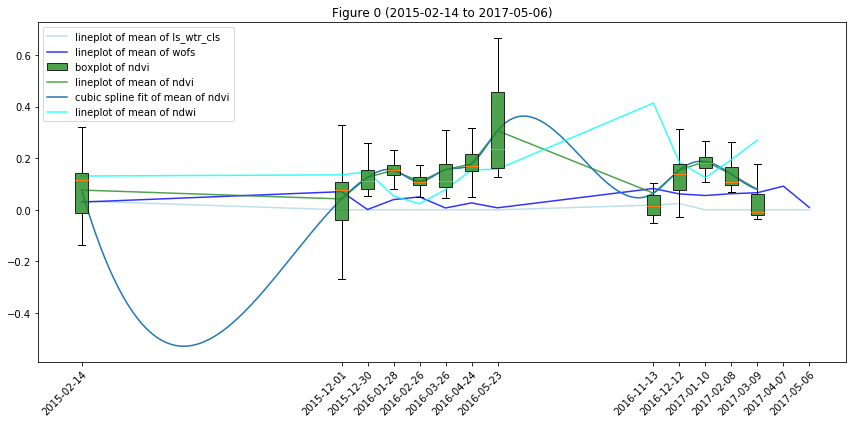

In [91]:
from utils.data_cube_utilities.aggregate import xarray_bin_time
# Specify whether to plot a cubic spline curve fit of NDVI.
plot_cubic_spline_ndvi = True

ndvi_color = 'forestgreen'
wofs_color = 'blue'
ls_wtr_cls_color = 'lightblue'
ndwi_color = 'aqua'
alpha = 0.8 # Standard amount of transparency.

# Can be one of [None, 'week', 'month', 'weekofyear', 'monthofyear'].
# for bin_by in [None, 'week', 'month', 'weekofyear', 'monthofyear']:
for bin_by in ['month']:
    aggregated_by_str = None
    if bin_by is None:
        plotting_data = cleaned_dataset
    elif bin_by == 'week':
        plotting_data = cleaned_dataset.resample(time='1w').mean()
        aggregated_by_str = 'Week'
    elif bin_by == 'month':
        plotting_data = cleaned_dataset.resample(time='1m').mean()
        aggregated_by_str = 'Month'
    elif bin_by == 'weekofyear':
        plotting_data = cleaned_dataset.groupby('time.week').mean(dim=('time'))
        aggregated_by_str = 'Week of Year'
    elif bin_by == 'monthofyear':
        plotting_data = cleaned_dataset.groupby('time.month').mean(dim=('time'))
        aggregated_by_str = 'Month of Year'
    
    plotting_data = xarray_bin_time(plotting_data, num_bins=min(50, len(plotting_data.time)))
    
    params = dict(dataset=plotting_data, 
              plot_descs={'ndvi':       {'mean': [{'line': {'color': ndvi_color, 'alpha':alpha}}],
                                         'none':  [{'box': {'boxprops': {'facecolor':ndvi_color, 'alpha':alpha}, 
                                                            'showfliers':False}}]},
                          'wofs':       {'mean': [{'line': {'color': wofs_color, 'alpha':alpha}}]},
                          'ls_wtr_cls': {'mean': [{'line': {'color': ls_wtr_cls_color, 'alpha':alpha}}]},
                          'ndwi':       {'mean': [{'line': {'color': ndwi_color, 'alpha':alpha}}]}},
              fig_params={'figsize':(12,6)})
    if plot_cubic_spline_ndvi:
        params['plot_descs']['ndvi']['mean'].append({'cubic_spline':{}})
    xarray_time_series_plot(**params)
    print("NDVI and WOFS {}".format("(Mean by {})".format(aggregated_by_str) if aggregated_by_str is not None else ""))

**Plot of Median by Month**

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


NDVI and WOFS (Median by Month)


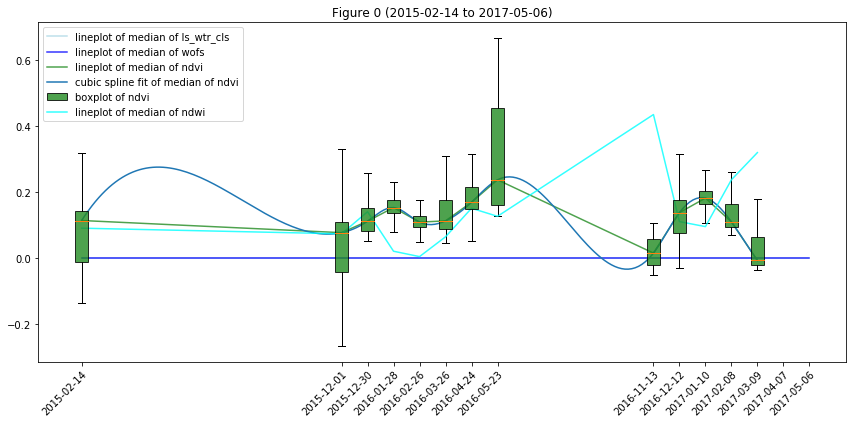

In [82]:
# Specify whether to plot a cubic spline curve fit of NDVI.
plot_cubic_spline_ndvi = True

ndvi_color = 'forestgreen'
wofs_color = 'blue'
ls_wtr_cls_color = 'lightblue'
ndwi_color = 'aqua'
alpha = 0.8 # Standard amount of transparency.

# Can be one of [None, 'week', 'month', 'weekofyear', 'monthofyear'].
# for bin_by in [None, 'week', 'month', 'weekofyear', 'monthofyear']:
for bin_by in ['month']:
    aggregated_by_str = None
    if bin_by is None:
        plotting_data = cleaned_dataset
    elif bin_by == 'week':
        plotting_data = cleaned_dataset.resample(time='1w').median()
        aggregated_by_str = 'Week'
    elif bin_by == 'month':
        plotting_data = cleaned_dataset.resample(time='1m').median()
        aggregated_by_str = 'Month'
    elif bin_by == 'weekofyear':
        plotting_data = cleaned_dataset.groupby('time.week').median(dim=('time'))
        aggregated_by_str = 'Week of Year'
    elif bin_by == 'monthofyear':
        plotting_data = cleaned_dataset.groupby('time.month').median(dim=('time'))
        aggregated_by_str = 'Month of Year'
    
    plotting_data = xarray_bin_time(plotting_data, num_bins=min(50, len(plotting_data.time)))
    
    params = dict(dataset=plotting_data, 
              plot_descs={'ndvi':       {'median': [{'line': {'color': ndvi_color, 'alpha':alpha}}],
                                         'none':  [{'box': {'boxprops': {'facecolor':ndvi_color, 'alpha':alpha}, 
                                                            'showfliers':False}}]},
                          'wofs':       {'median': [{'line': {'color': wofs_color, 'alpha':alpha}}]},
                          'ls_wtr_cls': {'median': [{'line': {'color': ls_wtr_cls_color, 'alpha':alpha}}]},
                          'ndwi':       {'median': [{'line': {'color': ndwi_color, 'alpha':alpha}}]}},
              fig_params={'figsize':(12,6)})
    if plot_cubic_spline_ndvi:
        params['plot_descs']['ndvi']['median'].append({'cubic_spline':{}})
    xarray_time_series_plot(**params)
    print("NDVI and WOFS {}".format("(Median by {})".format(aggregated_by_str) if aggregated_by_str is not None else ""))

**Plot of Mean by Week**

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


NDVI and WOFS (Mean by Week)


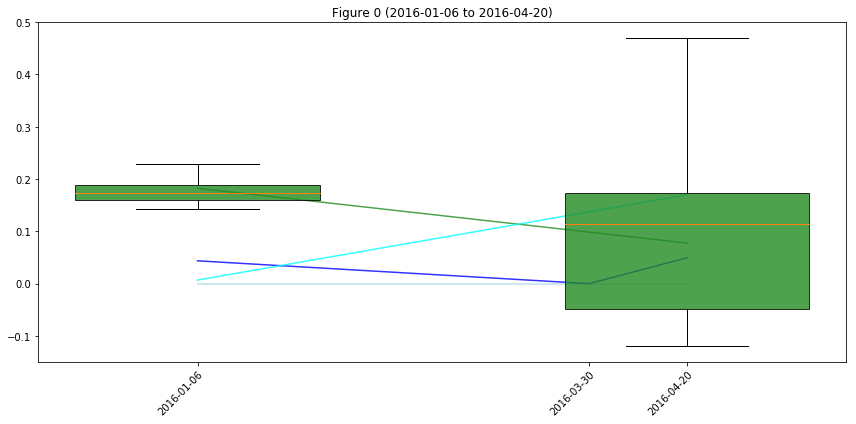

In [83]:
# Specify whether to plot a cubic spline curve fit of NDVI.
plot_cubic_spline_ndvi = True

ndvi_color = 'forestgreen'
wofs_color = 'blue'
ls_wtr_cls_color = 'lightblue'
ndwi_color = 'aqua'
alpha = 0.8 # Standard amount of transparency.

# Can be one of [None, 'week', 'month', 'weekofyear', 'monthofyear'].
# for bin_by in [None, 'week', 'month', 'weekofyear', 'monthofyear']:
for bin_by in ['week']:
    aggregated_by_str = None
    if bin_by is None:
        plotting_data = cleaned_dataset
    elif bin_by == 'week':
        plotting_data = cleaned_dataset.resample(time='1w').mean()
        aggregated_by_str = 'Week'
    elif bin_by == 'month':
        plotting_data = cleaned_dataset.resample(time='1m').mean()
        aggregated_by_str = 'Month'
    elif bin_by == 'weekofyear':
        plotting_data = cleaned_dataset.groupby('time.week').mean(dim=('time'))
        aggregated_by_str = 'Week of Year'
    elif bin_by == 'monthofyear':
        plotting_data = cleaned_dataset.groupby('time.month').mean(dim=('time'))
        aggregated_by_str = 'Month of Year'
    
    plotting_data = xarray_bin_time(plotting_data, num_bins=min(50, len(plotting_data.time)))
    
    params = dict(dataset=plotting_data, 
              plot_descs={'ndvi':       {'mean': [{'line': {'color': ndvi_color, 'alpha':alpha}}],
                                         'none':  [{'box': {'boxprops': {'facecolor':ndvi_color, 'alpha':alpha}, 
                                                            'showfliers':False}}]},
                          'wofs':       {'mean': [{'line': {'color': wofs_color, 'alpha':alpha}}]},
                          'ls_wtr_cls': {'mean': [{'line': {'color': ls_wtr_cls_color, 'alpha':alpha}}]},
                          'ndwi':       {'mean': [{'line': {'color': ndwi_color, 'alpha':alpha}}]}},
              fig_params={'figsize':(12,6)}, show_legend=False)
    if plot_cubic_spline_ndvi:
        params['plot_descs']['ndvi']['mean'].append({'cubic_spline':{}})
    xarray_time_series_plot(**params, max_times_per_plot=15)
    print("NDVI and WOFS {}".format("(Mean by {})".format(aggregated_by_str) if aggregated_by_str is not None else ""))

**Plot of Median by Week**

/home/localuser/Datacube/datacube_env/lib/python3.5/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


NDVI and WOFS (Median by Week)


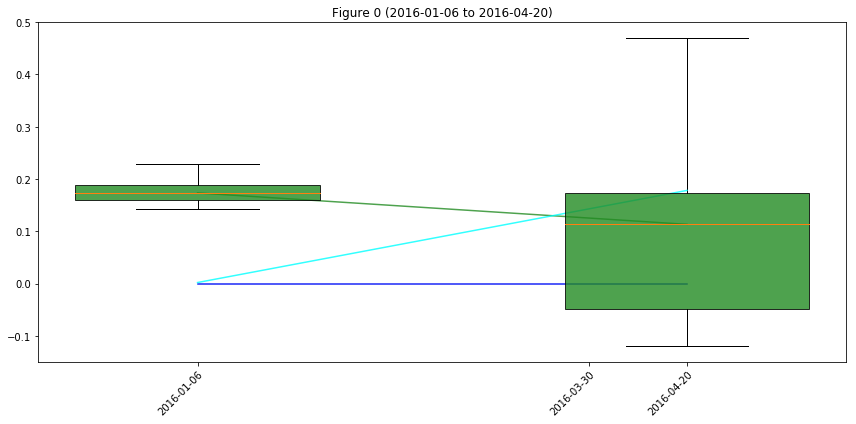

In [84]:
# Specify whether to plot a cubic spline curve fit of NDVI.
plot_cubic_spline_ndvi = True

ndvi_color = 'forestgreen'
wofs_color = 'blue'
ls_wtr_cls_color = 'lightblue'
ndwi_color = 'aqua'
alpha = 0.8 # Standard amount of transparency.

# Can be one of [None, 'week', 'month', 'weekofyear', 'monthofyear'].
# for bin_by in [None, 'week', 'month', 'weekofyear', 'monthofyear']:
for bin_by in ['week']:
    aggregated_by_str = None
    if bin_by is None:
        plotting_data = cleaned_dataset
    elif bin_by == 'week':
        plotting_data = cleaned_dataset.resample(time='1w').median()
        aggregated_by_str = 'Week'
    elif bin_by == 'month':
        plotting_data = cleaned_dataset.resample(time='1m').median()
        aggregated_by_str = 'Month'
    elif bin_by == 'weekofyear':
        plotting_data = cleaned_dataset.groupby('time.week').median(dim=('time'))
        aggregated_by_str = 'Week of Year'
    elif bin_by == 'monthofyear':
        plotting_data = cleaned_dataset.groupby('time.month').median(dim=('time'))
        aggregated_by_str = 'Month of Year'
    
    plotting_data = xarray_bin_time(plotting_data, num_bins=min(50, len(plotting_data.time)))
    
    params = dict(dataset=plotting_data, 
              plot_descs={'ndvi':       {'median': [{'line': {'color': ndvi_color, 'alpha':alpha}}],
                                         'none':  [{'box': {'boxprops': {'facecolor':ndvi_color, 'alpha':alpha}, 
                                                            'showfliers':False}}]},
                          'wofs':       {'median': [{'line': {'color': wofs_color, 'alpha':alpha}}]},
                          'ls_wtr_cls': {'median': [{'line': {'color': ls_wtr_cls_color, 'alpha':alpha}}]},
                          'ndwi':       {'median': [{'line': {'color': ndwi_color, 'alpha':alpha}}]}},
              fig_params={'figsize':(12,6)}, show_legend=False)
    if plot_cubic_spline_ndvi:
        params['plot_descs']['ndvi']['median'].append({'cubic_spline':{}})
    xarray_time_series_plot(**params, max_times_per_plot=15)
    print("NDVI and WOFS {}".format("(Median by {})".format(aggregated_by_str) if aggregated_by_str is not None else ""))